# SVM Classification with the Iris Dataset

In [1]:
# import all of the libraries that we will need
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [2]:
# create dataframe
iris = datasets.load_iris()
vals = iris.data
df = pd.DataFrame(vals)
df.columns = iris.feature_names
plant_type = iris.target
df['target'] = plant_type
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


For our example we will only use two features, sepal length and petal length, to help us classify

In [3]:
#make reduced dataset
data = df.drop(['sepal width (cm)','petal width (cm)'],axis = 1)[:100]
data.tail()
# data.shape

,sepal length (cm),petal length (cm),target
95,5.7,4.2,1
96,5.7,4.2,1
97,6.2,4.3,1
98,5.1,3.0,1
99,5.7,4.1,1


In [4]:
#split into train and test data sets
predictors = data.drop('target',axis=1)
targ = data.target
X_train,X_test,y_train,y_test = train_test_split(predictors,targ,test_size = 0.33)

#verify train/test data
print('xtrain\n',X_train.head(),'\nytrain\n',y_train.head(),'\nxtest\n',X_test.head(),'\nytest\n',y_test.head())

xtrain
     sepal length (cm)  petal length (cm)
66                5.6                4.5
71                6.1                4.0
85                6.0                4.5
4                 5.0                1.4
78                6.0                4.5 
ytrain
 66    1
71    1
85    1
4     0
78    1
Name: target, dtype: int32 
xtest
     sepal length (cm)  petal length (cm)
67                5.8                4.1
14                5.8                1.2
5                 5.4                1.7
1                 4.9                1.4
69                5.6                3.9 
ytest
 67    1
14    0
5     0
1     0
69    1
Name: target, dtype: int32


Now we will train our svm classifier with the training sets

In [5]:
clf = SVC(kernel ='linear')
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Then we test its predictive accuracy with the X_test and y_test

In [6]:
predictions = clf.predict(X_test)

#verify dimensions if needed
# print(predictions.shape,y_test.shape)
acc = accuracy_score(predictions,np.array(y_test))
print('Our SVM Classifier %r percent accurate' %(acc*100))

Our SVM Classifier 100.0 percent accurate


Let's visualize what we have done

In [7]:
def plot_decision_regions(X,y,classifier,test_idx = None, resolution = 0.02):
    #setup marker generator and color map
    markers = ['s','x']#,'o','v','^']
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min,x1_max = X[:,0].min() - 1, X[:,0].max() + 1 #sepal length
    x2_min,x2_max = X[:,1].min() - 1, X[:,1].max() + 1 #petal length
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1,xx2,Z,alpha = 0.4,cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y==cl,0],y = X[y==cl,1],alpha = 0.8,c=cmap(idx),marker = markers[idx],label = cl)
      


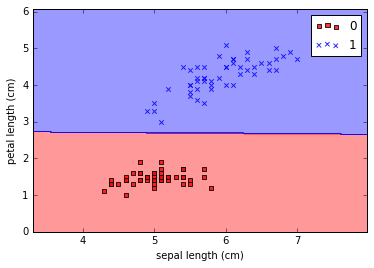

In [10]:
plot_decision_regions(X = np.array(predictors), y = np.array(targ), classifier=clf)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc = 'upper right')
plt.show()


End of Post